In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [3]:
train = pd.read_csv('train.csv')
train.head()

,image_names,cell_type,xmin,xmax,ymin,ymax
0,1.jpg,leafblast,1396,1480,1330,1596
1,1.jpg,leafblast,1303,1368,1622,1760
2,1.jpg,leafblast,1436,1461,1685,1748
3,1.jpg,leafblast,660,731,760,926
4,1.jpg,leafblast,808,833,1372,1439


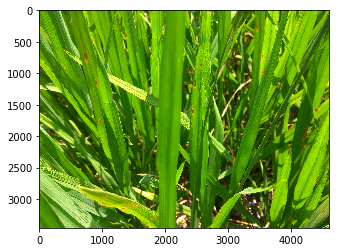

In [4]:
image = plt.imread('images/1.jpg')
plt.imshow(image)

In [5]:
train['image_names'].nunique()

9

In [6]:
train['cell_type'].value_counts()

leafblast    232
Name: cell_type, dtype: int64

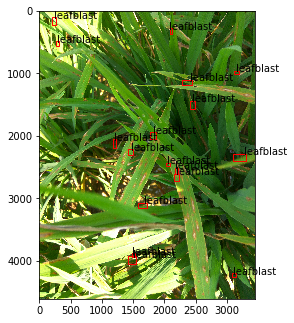

In [20]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('images/6.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "6.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'leafblast':
        edgecolor = 'r'
        ax.annotate('leafblast', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'WBC':
#         edgecolor = 'b'
#         ax.annotate('WBC', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'Platelets':
#         edgecolor = 'g'
#         ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)
    

In [10]:
#data .csv to .txt format
data = pd.DataFrame()
data['format'] = train['image_names']
for i in range(data.shape[0]):
    data['format'][i] = 'train_images/' + data['format'][i]
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['cell_type'][i]
data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [11]:
f = open("annotate.txt", "r")
print(f.read())

train_images/1.jpg,1396,1330,1480,1596,leafblast
train_images/1.jpg,1303,1622,1368,1760,leafblast
train_images/1.jpg,1436,1685,1461,1748,leafblast
train_images/1.jpg,660,760,731,926,leafblast
train_images/1.jpg,808,1372,833,1439,leafblast
train_images/1.jpg,760,1160,813,1224,leafblast
train_images/1.jpg,307,1294,371,1366,leafblast
train_images/1.jpg,308,1173,362,1228,leafblast
train_images/1.jpg,269,1027,405,1114,leafblast
train_images/1.jpg,794,1081,827,1136,leafblast
train_images/1.jpg,1888,1908,1990,1941,leafblast
train_images/1.jpg,2271,1577,2696,1639,leafblast
train_images/1.jpg,2130,1645,2210,1678,leafblast
train_images/1.jpg,2988,1848,3040,1903,leafblast
train_images/1.jpg,2444,1973,2587,2008,leafblast
train_images/1.jpg,2555,2100,2618,2211,leafblast
train_images/1.jpg,2708,2066,2743,2089,leafblast
train_images/1.jpg,2444,2298,2469,2338,leafblast
train_images/1.jpg,2601,2450,2682,2703,leafblast
train_images/1.jpg,2262,2261,2315,2303,leafblast
train_images/1.jpg,2101,2188,2213,22